# Example: Definition and Use of ERARosen and ERACond Objects

This example demonstrates how to create a multivariate distribution with the ERARosen class using ERACond and ERADist distribution objects.

**Developed by:** Sebastian Geyer, Felipe Uribe, Iason Papaioannou, Daniel Straub  
**Assistant Developers:** Luca Sardi, Alexander von Ramm, Matthias Willer, Peter Kaplan  
**Engineering Risk Analysis Group**  
**Technische Universitat Munchen**  
**Version:** 2022-01


## Import Required Libraries


In [ ]:
from eraUQ import ERADist, ERACond, ERARosen
import numpy as np


## Initialize Random Number Generator


In [2]:
np.random.seed(2021)  # initializing random number generator
n = 5  # number of data points


## Creation of Distribution Objects


In [3]:
# marginal distributions defined by ERADist classes
x1_dist = ERADist('normal', 'PAR', [3, 2], 'A')
x2_dist = ERADist('normal', 'PAR', [5, 4], 'B')

# conditional distributions defined by ERACond classes
a = 3  # use of a constant in function handle for demonstration purposes
# conditional distributions defined by ERACond classes
x3_dist = ERACond('normal', 'PAR', lambda X: [X[0] * X[1] + a, 2], 'C')
# use of a user-defined function for demonstration purposes in x4_dist
def subtraction(a, b):
    return (a - b)

x4_dist = ERACond('normal', 'PAR', lambda X: [subtraction(X[0], X[1]), abs(X[0])], 'D')
x5_dist = ERACond('exponential', 'PAR', lambda X: abs(X[0]**2 - X[1]), 'E')
x6_dist = ERACond('normal', 'PAR', lambda X: [3 * X, 4], 'F')
x7_dist = ERACond('normal', 'PAR', lambda X: [X[0] + X[1] - X[2], 1], 'G')

print("Created distribution objects:")
print(f"  - x1_dist: {x1_dist}")
print(f"  - x2_dist: {x2_dist}")
print(f"  - x3_dist: {x3_dist}")
print(f"  - x4_dist: {x4_dist}")
print(f"  - x5_dist: {x5_dist}")
print(f"  - x6_dist: {x6_dist}")
print(f"  - x7_dist: {x7_dist}")


Created distribution objects:
  - x1_dist: <ERApy.ERADist.ERADist object at 0x124749d30>
  - x2_dist: <ERApy.ERADist.ERADist object at 0x105da0190>
  - x3_dist: <ERApy.ERACond.ERACond object at 0x124749fd0>
  - x4_dist: <ERApy.ERACond.ERACond object at 0x124732850>
  - x5_dist: <ERApy.ERACond.ERACond object at 0x124732990>
  - x6_dist: <ERApy.ERACond.ERACond object at 0x105d75480>
  - x7_dist: <ERApy.ERACond.ERACond object at 0x123daa3f0>


## Create ERARosen Object


In [4]:
# collecting all the distribution objects in a list
dist = [x1_dist, x2_dist, x3_dist, x4_dist, x5_dist, x6_dist, x7_dist]

# describing the dependency by parents using a list
depend = [[], [], [0, 1], [0, 2], [2, 1], 3, [2, 3, 4]]

# creation of the ERARosen class
X_dist = ERARosen(dist, depend)

print("ERARosen object created")
print(f"Number of distributions: {len(dist)}")
print(f"Dependency structure: {depend}")


ERARosen object created
Number of distributions: 7
Dependency structure: [[], [], [0, 1], [0, 2], [2, 1], 3, [2, 3, 4]]


## Plot Dependency Graph


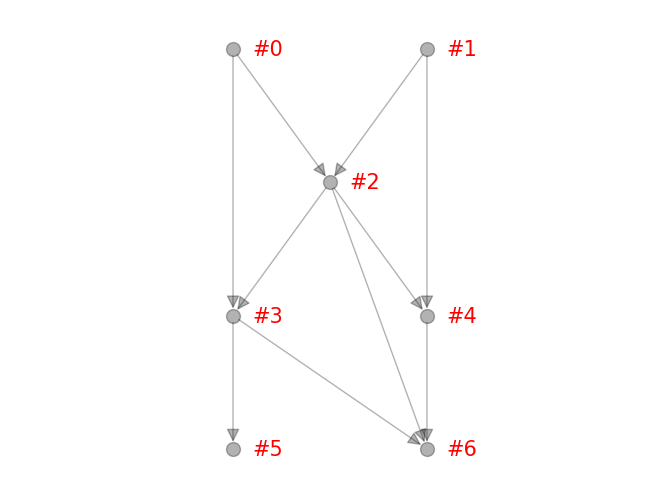

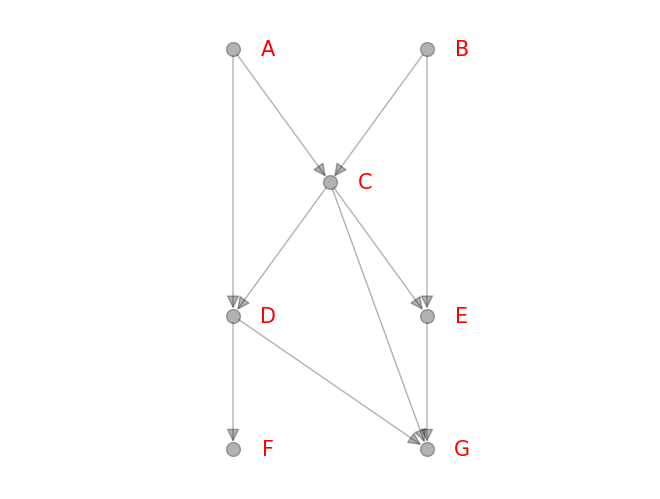

In [5]:
# plot of the graph defining the dependency in the distribution

# ...with naming of the nodes according to their order in input dist
# (overwrites the ID of the distribution)
figure_numb = X_dist.plotGraph('numbering')

# ... with naming of the nodes according to their ID
figure = X_dist.plotGraph()


## Methods of the ERARosen Class


In [6]:
# creation of n samples of the joint distribution
X = X_dist.random(n)

# transformation from physical space X to the standard normal space U
U = X_dist.X2U(X)

# transformation from standard normal space U to physical space X
X_backtransform = X_dist.U2X(U)

# computation of joint PDF
pdf = X_dist.pdf(X)

print(f"Generated {n} samples from joint distribution")
print(f"Sample shape: {X.shape}")
print(f"\nSamples X:")
print(X)
print(f"\nTransformed to standard normal space U:")
print(U)
print(f"\nBacktransformed X:")
print(X_backtransform)
print(f"\nJoint PDF values: {pdf}")

print("\nERARosen and ERACond example completed!")


Generated 5 samples from joint distribution
Sample shape: (5, 7)

Samples X:
[[ 5.97721811e+00  2.17798285e+00  1.62666922e+01 -3.71319350e+00
   3.33943456e-03 -1.03289808e+01  1.13000139e+01]
 [ 4.35202174e+00  9.52343305e+00  4.27702808e+01 -4.45212082e+01
   3.55462925e-04 -1.35593050e+02 -3.26324090e+00]
 [ 2.16309726e+00  7.58000735e+00  2.02143245e+01 -1.85380999e+01
   1.81884142e-03 -5.13783711e+01  2.56898050e+00]
 [ 1.38695837e+00  5.42565497e+00  1.07306600e+01 -1.11969637e+01
   1.57869185e-02 -3.17379497e+01 -2.39280184e-01]
 [ 4.11175166e+00  6.68861932e+00  2.66864968e+01 -2.13259177e+01
   1.86767503e-03 -6.19897591e+01  6.36549755e+00]]

Transformed to standard normal space U:
[[ 1.48860905 -0.70550429  0.12420684  1.1002243   0.21137845  0.20264991
  -1.25014539]
 [ 0.67601087  1.13085826 -0.83795346 -1.40232506 -0.05940824 -0.50735635
  -1.51195802]
 [-0.41845137  0.64500184  0.4090157  -0.22508127  0.04466893  1.05898217
   0.89457475]
 [-0.80652081  0.10641374  0.